In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
h = 0.25

In [3]:
fFD =  1./(2.*h*h) 
fPD =  1./(8.*h/2*h/2) 

In [4]:
M = np.zeros([23,23])

In [5]:
M [0][0] = 1

In [6]:
for i in range (1,4):
    M [i][i-1] = -2 * fFD
    M [i][i] = 4 * fFD
    M [i][i+1] = -2 * fFD

Match the displacement $u_3$ and $u_5$

In [7]:
M [5][5] = -1
M [5][3] = 1

Match the displacement $u_4$ and $u_7$

In [8]:
M [4][4] = -1
M [4][7] = 1

Interpolate the displacement $u_6$ and $u_6'$

* $u_6'-u_6=0$
* $\frac{1}{2}\left(u_3 + u_4\right)-u_5=0$

In [9]:
M [6][6] = -1
M [6][2] = -1/8
M [6][3] = 3/4
M [6][4] = 3/8

Apply the non-local model

In [10]:
for i in range(7,16):
    M[i][i-2] = -1.  * fPD
    M[i][i-1] = -4. * fPD
    M[i][i] = 10. * fPD
    M[i][i+1] =  -4. * fPD
    M[i][i+2] = -1. * fPD

Interpolate the displacement $u_{16}$ and $u_{16}'$

In [11]:
M [16][16] = -1
M [16][18] = 3/8
M [16][19] = 3/4
M [16][20] = -1/8

Match the displacement $u_{17}$ and $u_{19}$

In [12]:
M [17][17] = -1
M [17][19] = 1

Match the displacement $u_{15}$ and $u_{18}$

In [13]:
M [18][18] = -1
M [18][15] = 1

In [14]:
for i in range (19,22):
    M [i][i-1] = -2  * fFD
    M [i][i] = 4 * fFD
    M [i][i+1] = -2 * fFD

In [15]:
M [22][22] = 1

In [16]:
M

array([[  1.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ],
       [-16.   ,  32.   , -16.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ],
       [  0.   , -16.   ,  32.   , -16.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ],
       [  0.   ,   0.   , -16.   ,  32.   , -16.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
          0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ,   0. 

In [17]:
x=np.arange(0,1,0.125)
x

array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875])

In [18]:
x1 = np.arange(0,1.25,0.25)
x1

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [19]:
x2 = np.arange(1-2*0.125,2+3*0.125,0.125)
x2

array([0.75 , 0.875, 1.   , 1.125, 1.25 , 1.375, 1.5  , 1.625, 1.75 ,
       1.875, 2.   , 2.125, 2.25 ])

In [20]:
x3 = np.arange(2,3.25,0.25)
x3

array([2.  , 2.25, 2.5 , 2.75, 3.  ])

In [21]:
x = np.array(np.concatenate((x1,x2,x3)))
x

array([0.   , 0.25 , 0.5  , 0.75 , 1.   , 0.75 , 0.875, 1.   , 1.125,
       1.25 , 1.375, 1.5  , 1.625, 1.75 , 1.875, 2.   , 2.125, 2.25 ,
       2.   , 2.25 , 2.5  , 2.75 , 3.   ])

Contruct the force vector

In [22]:
f = np.zeros([23])
f

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [23]:
for i in range(1,len(f)-1):
    f[i] = -( 2/np.sqrt(3)) * ( -6 + 4*x[i] ) 

In [24]:
f [4] = 0 # the displacememnt is matching therefore the force is zero
f [5] = 0 
f [6] = 0 
f [18] = 0 
f [16] = 0
f [17] = 0

In [25]:
f

array([ 0.        ,  5.77350269,  4.61880215,  3.46410162,  0.        ,
        0.        ,  0.        ,  2.30940108,  1.73205081,  1.15470054,
        0.57735027, -0.        , -0.57735027, -1.15470054, -1.73205081,
       -2.30940108,  0.        ,  0.        ,  0.        , -3.46410162,
       -4.61880215, -5.77350269,  0.        ])

In [26]:
u = np.linalg.solve(M,f)
u

array([-0.00000000e+00,  6.63641231e-01,  9.66438545e-01,  9.80560723e-01,
        7.78176551e-01,  9.80560723e-01,  9.06431931e-01,  7.78176551e-01,
        6.15384554e-01,  4.25263713e-01,  2.17146199e-01,  8.25575856e-16,
       -2.17146199e-01, -4.25263713e-01, -6.15384554e-01, -7.78176551e-01,
       -9.06431931e-01, -9.80560723e-01, -7.78176551e-01, -9.80560723e-01,
       -9.66438545e-01, -6.63641231e-01,  0.00000000e+00])

In [27]:
x1 = np.arange(0,1,0.25)
x2 = np.arange(1,2,0.125)
x3 = np.arange(2,3.25,0.25)
x20 = np.array(np.concatenate((x1,x2,x3)))
x20

array([0.   , 0.25 , 0.5  , 0.75 , 1.   , 1.125, 1.25 , 1.375, 1.5  ,
       1.625, 1.75 , 1.875, 2.   , 2.25 , 2.5  , 2.75 , 3.   ])

In [28]:
uSlice = np.array(np.concatenate((u[0:5],u[8:15],u[18:len(u)])))
uSlice

array([-0.00000000e+00,  6.63641231e-01,  9.66438545e-01,  9.80560723e-01,
        7.78176551e-01,  6.15384554e-01,  4.25263713e-01,  2.17146199e-01,
        8.25575856e-16, -2.17146199e-01, -4.25263713e-01, -6.15384554e-01,
       -7.78176551e-01, -9.80560723e-01, -9.66438545e-01, -6.63641231e-01,
        0.00000000e+00])

In [29]:
len(u)

23

In [30]:
len(uSlice)

17

In [31]:
len(x20)

17

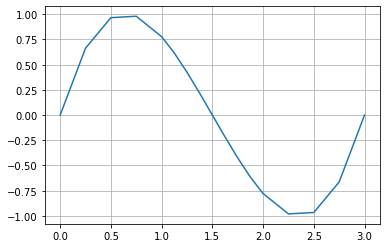

In [32]:
plt.plot(x20,uSlice)
plt.grid()

In [33]:
h2= 0.125

In [34]:
fFD2 =  1./(2.*h2*h2) 
fPD2 =  1./(8.*h2/2*h2/2) 

In [35]:
M2 = np.zeros([39,39])

In [36]:
M2 [0][0] = 1

In [37]:
for i in range (1, 8):
    M2[i][i-1]=-2 * fFD2
    M2[i][i]= 4 * fFD2
    M2[i][i+1]= -2 * fFD2

Match the dispacement between $u_7$ and $u_9$

In [38]:
M2[9][9]= -1
M2[9][7]=1

Match the dispacement between $u_8$ and $u_{11}$

In [39]:
M2[8][8]= -1
M2[8][11]=1

Interpolate the displacement $u_{10}$ and $u_{9}'$

* $u_{10}'-u_{10}=0$
* $\frac{1}{2}\left(u_7 + u_8\right)-u_{10}=0$

In [40]:
M2 [10][10] = -1
M2 [10][6] = -1/8
M2 [10][7] = 3/4
M2 [10][8] = 3/8

Apply the non-local model

In [41]:
for i in range(11,28):
    M2[i][i-2] = -1.  * fPD2
    M2[i][i-1] = -4. * fPD2
    M2[i][i] = 10. * fPD2
    M2[i][i+1] =  -4. * fPD2
    M2[i][i+2] = -1. * fPD2

Interpolate the displacement $u_{28}$ and $u_{28}'$

* $u_{28}'-u_{28}=0$
* $\frac{1}{2}\left(u_{30} + u_{31}\right)-u_{28}=0$

In [42]:
M2 [28][28] = -1
M2 [28][30] = 3/8
M2 [28][31] = 3/4
M2 [28][32] = -1/8

Match the displacement $u_{29}$ and $u_{31}$

In [43]:
M2 [29][29] = -1
M2 [29][31] = 1

Match the displacement $u_{27}$ and $u_{30}$

In [44]:
M2 [30][30] = -1
M2 [30][27] = 1

In [45]:
for i in range (31, 38):
    M2[i][i-1]=-2 * fFD2
    M2[i][i]= 4 * fFD2
    M2[i][i+1]= -2 * fFD2

In [46]:
M2 [38][38] = 1
M2

array([[  1.,   0.,   0., ...,   0.,   0.,   0.],
       [-64., 128., -64., ...,   0.,   0.,   0.],
       [  0., -64., 128., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ..., 128., -64.,   0.],
       [  0.,   0.,   0., ..., -64., 128., -64.],
       [  0.,   0.,   0., ...,   0.,   0.,   1.]])

In [47]:
x1 = np.arange(0,1.125,0.125)
x2 = np.arange(1-2*0.0625,2+3*0.0625,0.0625)
x3 = np.arange(2,3.125,0.125)
x = np.array(np.concatenate((x1,x2,x3)))
x

array([0.    , 0.125 , 0.25  , 0.375 , 0.5   , 0.625 , 0.75  , 0.875 ,
       1.    , 0.875 , 0.9375, 1.    , 1.0625, 1.125 , 1.1875, 1.25  ,
       1.3125, 1.375 , 1.4375, 1.5   , 1.5625, 1.625 , 1.6875, 1.75  ,
       1.8125, 1.875 , 1.9375, 2.    , 2.0625, 2.125 , 2.    , 2.125 ,
       2.25  , 2.375 , 2.5   , 2.625 , 2.75  , 2.875 , 3.    ])

In [48]:
f2 = np.zeros([39])
f2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [49]:
for i in range(1,len(f2)-1):
    f2[i] = -( 2/np.sqrt(3)) * ( -6 + 4*x[i] ) 

In [50]:
f2 [8] = 0 # the displacememnt is matching therefore the force is zero
f2 [9] = 0 
f2 [10] = 0 
f2 [30] = 0 
f2 [28] = 0
f2 [29] = 0
f2

array([ 0.        ,  6.35085296,  5.77350269,  5.19615242,  4.61880215,
        4.04145188,  3.46410162,  2.88675135,  0.        ,  0.        ,
        0.        ,  2.30940108,  2.02072594,  1.73205081,  1.44337567,
        1.15470054,  0.8660254 ,  0.57735027,  0.28867513, -0.        ,
       -0.28867513, -0.57735027, -0.8660254 , -1.15470054, -1.44337567,
       -1.73205081, -2.02072594, -2.30940108,  0.        ,  0.        ,
        0.        , -2.88675135, -3.46410162, -4.04145188, -4.61880215,
       -5.19615242, -5.77350269, -6.35085296,  0.        ])

In [51]:
u2 = np.linalg.solve(M2,f2)
u2

array([-3.33066907e-16,  3.80653402e-01,  6.62074726e-01,  8.53285071e-01,
        9.63305534e-01,  1.00115721e+00,  9.75861207e-01,  8.96438613e-01,
        7.71910529e-01,  8.96438613e-01,  8.39812758e-01,  7.71910529e-01,
        6.95180675e-01,  6.10524166e-01,  5.19107528e-01,  4.22051728e-01,
        3.20485545e-01,  2.15536423e-01,  1.08332030e-01, -7.23803368e-15,
       -1.08332030e-01, -2.15536423e-01, -3.20485545e-01, -4.22051728e-01,
       -5.19107528e-01, -6.10524166e-01, -6.95180675e-01, -7.71910529e-01,
       -8.39812758e-01, -8.96438613e-01, -7.71910529e-01, -8.96438613e-01,
       -9.75861207e-01, -1.00115721e+00, -9.63305534e-01, -8.53285071e-01,
       -6.62074726e-01, -3.80653402e-01,  0.00000000e+00])

In [52]:
x4 = np.arange(0,1,0.125)
x5 = np.arange(1,2,0.0625)
x6 = np.arange(2,3.125,0.125)
x7 = np.array(np.concatenate((x4,x5,x6)))
x7

array([0.    , 0.125 , 0.25  , 0.375 , 0.5   , 0.625 , 0.75  , 0.875 ,
       1.    , 1.0625, 1.125 , 1.1875, 1.25  , 1.3125, 1.375 , 1.4375,
       1.5   , 1.5625, 1.625 , 1.6875, 1.75  , 1.8125, 1.875 , 1.9375,
       2.    , 2.125 , 2.25  , 2.375 , 2.5   , 2.625 , 2.75  , 2.875 ,
       3.    ])

In [53]:
uSlice2 = np.array(np.concatenate((u2[0:9],u2[12:27],u2[30:len(u2)])))
uSlice2

array([-3.33066907e-16,  3.80653402e-01,  6.62074726e-01,  8.53285071e-01,
        9.63305534e-01,  1.00115721e+00,  9.75861207e-01,  8.96438613e-01,
        7.71910529e-01,  6.95180675e-01,  6.10524166e-01,  5.19107528e-01,
        4.22051728e-01,  3.20485545e-01,  2.15536423e-01,  1.08332030e-01,
       -7.23803368e-15, -1.08332030e-01, -2.15536423e-01, -3.20485545e-01,
       -4.22051728e-01, -5.19107528e-01, -6.10524166e-01, -6.95180675e-01,
       -7.71910529e-01, -8.96438613e-01, -9.75861207e-01, -1.00115721e+00,
       -9.63305534e-01, -8.53285071e-01, -6.62074726e-01, -3.80653402e-01,
        0.00000000e+00])

In [54]:
len(u2)

39

In [55]:
len(x7)

33

In [56]:
len(uSlice2)

33

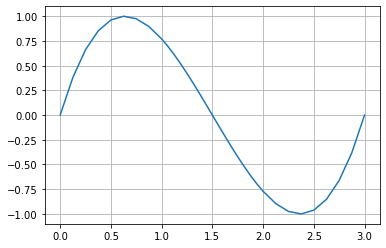

In [57]:
plt.plot(x7,uSlice2)
plt.grid()

In [58]:
h3=0.0625

In [59]:
fFD3 =  1./(2.*h3*h3) 
fPD3 =  1./(8.*h3/2*h3/2) 

In [60]:
M3 = np.zeros([71,71])

In [61]:
M3 [0][0] = 1

In [62]:
for i in range (1, 16):
    M3[i][i-1]=-2 * fFD3
    M3[i][i]= 4 * fFD3
    M3[i][i+1]= -2 * fFD3

Match the dispacement between $u_{15}$ and $u_{17}$

In [63]:
M3[17][17]= -1
M3[17][15]=1

Match the dispacement between $u_{16}$ and $u_{19}$

In [64]:
M3[16][16]= -1
M3[16][19]=1

Interpolate the displacement $u_{18}$ and $u_{18}'$

* $u_{18}'-u_{18}=0$
* $\frac{1}{2}\left(u_{15} + u_{16}\right)-u_{18}=0$

In [65]:
M3 [18][18] = -1
M3 [18][14]= -1/8
M3 [18][15] = 3/4
M3 [18][16] = 3/8

Apply the non-local model

In [66]:
for i in range(19,52):
    M3[i][i-2] = -1.  * fPD3
    M3[i][i-1] = -4. * fPD3
    M3[i][i] = 10. * fPD3
    M3[i][i+1] =  -4. * fPD3
    M3[i][i+2] = -1. * fPD3

Interpolate the displacement $u_{52}$ and $u_{52}'$

* $u_{52}'-u_{52}=0$
* $\frac{1}{2}\left(u_{54} + u_{55}\right)-u_{52}=0$

In [67]:
M3 [52][52] = -1
M3 [52][54] = 3/8
M3 [52][55] = 3/4
M3 [52][56] = -1/8

Match the displacement $u_{51}$ and $u_{54}$

In [68]:
M3 [54][54] = -1
M3 [54][51] = 1

Match the displacement $u_{53}$ and $u_{55}$

In [69]:
M3 [53][53] = -1
M3 [53][55] = 1

In [70]:
for i in range (55, 70):
    M3[i][i-1]=-2 * fFD3
    M3[i][i]= 4 * fFD3
    M3[i][i+1]= -2 * fFD3

In [71]:
M3 [70][70] = 1
M3

array([[   1.,    0.,    0., ...,    0.,    0.,    0.],
       [-256.,  512., -256., ...,    0.,    0.,    0.],
       [   0., -256.,  512., ...,    0.,    0.,    0.],
       ...,
       [   0.,    0.,    0., ...,  512., -256.,    0.],
       [   0.,    0.,    0., ..., -256.,  512., -256.],
       [   0.,    0.,    0., ...,    0.,    0.,    1.]])

In [72]:
x1 = np.arange(0,1.0625,0.0625)
x2 = np.arange(1-2*0.03125,2+3*0.03125,0.03125)
x3 = np.arange(2,3.0625,0.0625)
x = np.array(np.concatenate((x1,x2,x3)))
x

array([0.     , 0.0625 , 0.125  , 0.1875 , 0.25   , 0.3125 , 0.375  ,
       0.4375 , 0.5    , 0.5625 , 0.625  , 0.6875 , 0.75   , 0.8125 ,
       0.875  , 0.9375 , 1.     , 0.9375 , 0.96875, 1.     , 1.03125,
       1.0625 , 1.09375, 1.125  , 1.15625, 1.1875 , 1.21875, 1.25   ,
       1.28125, 1.3125 , 1.34375, 1.375  , 1.40625, 1.4375 , 1.46875,
       1.5    , 1.53125, 1.5625 , 1.59375, 1.625  , 1.65625, 1.6875 ,
       1.71875, 1.75   , 1.78125, 1.8125 , 1.84375, 1.875  , 1.90625,
       1.9375 , 1.96875, 2.     , 2.03125, 2.0625 , 2.     , 2.0625 ,
       2.125  , 2.1875 , 2.25   , 2.3125 , 2.375  , 2.4375 , 2.5    ,
       2.5625 , 2.625  , 2.6875 , 2.75   , 2.8125 , 2.875  , 2.9375 ,
       3.     ])

In [73]:
f3 = np.zeros([71])
f3

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [74]:
for i in range(1,len(f3)-1):
    f3[i] = -( 2/np.sqrt(3)) * ( -6 + 4*x[i] ) 

In [75]:
f3 [16] = 0 # the displacememnt is matching therefore the force is zero
f3 [17] = 0 
f3 [18] = 0 
f3 [52] = 0 
f3 [53] = 0
f3 [54] = 0
f3

array([ 0.        ,  6.6395281 ,  6.35085296,  6.06217783,  5.77350269,
        5.48482756,  5.19615242,  4.90747729,  4.61880215,  4.33012702,
        4.04145188,  3.75277675,  3.46410162,  3.17542648,  2.88675135,
        2.59807621,  0.        ,  0.        ,  0.        ,  2.30940108,
        2.16506351,  2.02072594,  1.87638837,  1.73205081,  1.58771324,
        1.44337567,  1.29903811,  1.15470054,  1.01036297,  0.8660254 ,
        0.72168784,  0.57735027,  0.4330127 ,  0.28867513,  0.14433757,
       -0.        , -0.14433757, -0.28867513, -0.4330127 , -0.57735027,
       -0.72168784, -0.8660254 , -1.01036297, -1.15470054, -1.29903811,
       -1.44337567, -1.58771324, -1.73205081, -1.87638837, -2.02072594,
       -2.16506351, -2.30940108,  0.        ,  0.        ,  0.        ,
       -2.59807621, -2.88675135, -3.17542648, -3.46410162, -3.75277675,
       -4.04145188, -4.33012702, -4.61880215, -4.90747729, -5.19615242,
       -5.48482756, -5.77350269, -6.06217783, -6.35085296, -6.63

In [76]:
u3 = np.linalg.solve(M3,f3)
u3

array([-3.33066907e-16,  2.03195741e-01,  3.80455825e-01,  5.32907890e-01,
        6.61679573e-01,  7.67898511e-01,  8.52692341e-01,  9.17188701e-01,
        9.62515228e-01,  9.89799558e-01,  1.00016933e+00,  9.94752181e-01,
        9.74675748e-01,  9.41067667e-01,  8.95055577e-01,  8.37767115e-01,
        7.70329917e-01,  8.37767115e-01,  8.05317108e-01,  7.70329917e-01,
        7.33111636e-01,  6.93774885e-01,  6.52465481e-01,  6.09323545e-01,
        5.64490174e-01,  5.18106298e-01,  4.70312876e-01,  4.21250862e-01,
        3.71061211e-01,  3.19884877e-01,  2.67862815e-01,  2.15135980e-01,
        1.61845326e-01,  1.08131809e-01,  5.41363816e-02, -2.57118531e-14,
       -5.41363816e-02, -1.08131809e-01, -1.61845326e-01, -2.15135980e-01,
       -2.67862815e-01, -3.19884877e-01, -3.71061211e-01, -4.21250862e-01,
       -4.70312876e-01, -5.18106298e-01, -5.64490174e-01, -6.09323545e-01,
       -6.52465481e-01, -6.93774885e-01, -7.33111636e-01, -7.70329917e-01,
       -8.05317108e-01, -

In [77]:
x8 = np.arange(0,1,0.0625)
x9 = np.arange(1,2,0.03125)
x10 = np.arange(2,3.0625,0.0625)
x11 = np.array(np.concatenate((x8,x9,x10)))
x11

array([0.     , 0.0625 , 0.125  , 0.1875 , 0.25   , 0.3125 , 0.375  ,
       0.4375 , 0.5    , 0.5625 , 0.625  , 0.6875 , 0.75   , 0.8125 ,
       0.875  , 0.9375 , 1.     , 1.03125, 1.0625 , 1.09375, 1.125  ,
       1.15625, 1.1875 , 1.21875, 1.25   , 1.28125, 1.3125 , 1.34375,
       1.375  , 1.40625, 1.4375 , 1.46875, 1.5    , 1.53125, 1.5625 ,
       1.59375, 1.625  , 1.65625, 1.6875 , 1.71875, 1.75   , 1.78125,
       1.8125 , 1.84375, 1.875  , 1.90625, 1.9375 , 1.96875, 2.     ,
       2.0625 , 2.125  , 2.1875 , 2.25   , 2.3125 , 2.375  , 2.4375 ,
       2.5    , 2.5625 , 2.625  , 2.6875 , 2.75   , 2.8125 , 2.875  ,
       2.9375 , 3.     ])

In [78]:
uSlice3 = np.array(np.concatenate((u3[0:17],u3[20:52],u3[55:len(u3)])))
uSlice3

array([-3.33066907e-16,  2.03195741e-01,  3.80455825e-01,  5.32907890e-01,
        6.61679573e-01,  7.67898511e-01,  8.52692341e-01,  9.17188701e-01,
        9.62515228e-01,  9.89799558e-01,  1.00016933e+00,  9.94752181e-01,
        9.74675748e-01,  9.41067667e-01,  8.95055577e-01,  8.37767115e-01,
        7.70329917e-01,  7.33111636e-01,  6.93774885e-01,  6.52465481e-01,
        6.09323545e-01,  5.64490174e-01,  5.18106298e-01,  4.70312876e-01,
        4.21250862e-01,  3.71061211e-01,  3.19884877e-01,  2.67862815e-01,
        2.15135980e-01,  1.61845326e-01,  1.08131809e-01,  5.41363816e-02,
       -2.57118531e-14, -5.41363816e-02, -1.08131809e-01, -1.61845326e-01,
       -2.15135980e-01, -2.67862815e-01, -3.19884877e-01, -3.71061211e-01,
       -4.21250862e-01, -4.70312876e-01, -5.18106298e-01, -5.64490174e-01,
       -6.09323545e-01, -6.52465481e-01, -6.93774885e-01, -7.33111636e-01,
       -7.70329917e-01, -8.37767115e-01, -8.95055577e-01, -9.41067667e-01,
       -9.74675748e-01, -

In [79]:
len(x11)

65

In [80]:
len(uSlice3)

65

In [81]:
len(u3)

71

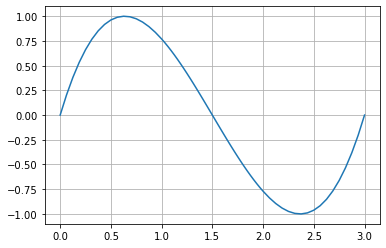

In [82]:
plt.grid()
plt.plot(x11,uSlice3)

In [83]:
def FDM (n,h):
    
    M4=np.zeros([n,n])

    M4[0][0] = 1

    for i in range(1,n-1):
        M4[i][i-1] = -2 
        M4[i][i] = 4 
        M4[i][i+1] = -2

    M4[n-1][n-1] = 1

    M4 *= 1./(2.*h*h)

    return M4

In [84]:
MFDM=FDM (49,0.0625)
len(MFDM)

49

In [85]:
fFDM=np.zeros([49])
len(fFDM)

49

In [86]:
x = np.arange(0,3.0625,0.0625)
x

array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
       0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
       1.    , 1.0625, 1.125 , 1.1875, 1.25  , 1.3125, 1.375 , 1.4375,
       1.5   , 1.5625, 1.625 , 1.6875, 1.75  , 1.8125, 1.875 , 1.9375,
       2.    , 2.0625, 2.125 , 2.1875, 2.25  , 2.3125, 2.375 , 2.4375,
       2.5   , 2.5625, 2.625 , 2.6875, 2.75  , 2.8125, 2.875 , 2.9375,
       3.    ])

In [87]:
for i in range(1,len(fFDM)-1):
    fFDM[i] = -( 2/np.sqrt(3)) * ( -6 + 4 * x[i] ) 
fFDM

array([ 0.        ,  6.6395281 ,  6.35085296,  6.06217783,  5.77350269,
        5.48482756,  5.19615242,  4.90747729,  4.61880215,  4.33012702,
        4.04145188,  3.75277675,  3.46410162,  3.17542648,  2.88675135,
        2.59807621,  2.30940108,  2.02072594,  1.73205081,  1.44337567,
        1.15470054,  0.8660254 ,  0.57735027,  0.28867513, -0.        ,
       -0.28867513, -0.57735027, -0.8660254 , -1.15470054, -1.44337567,
       -1.73205081, -2.02072594, -2.30940108, -2.59807621, -2.88675135,
       -3.17542648, -3.46410162, -3.75277675, -4.04145188, -4.33012702,
       -4.61880215, -4.90747729, -5.19615242, -5.48482756, -5.77350269,
       -6.06217783, -6.35085296, -6.6395281 ,  0.        ])

In [88]:
uFDM = np.linalg.solve(MFDM,fFDM)
uFDM

array([-0.00000000e+00,  2.03162644e-01,  3.80389630e-01,  5.32808598e-01,
        6.61547183e-01,  7.67733024e-01,  8.52493757e-01,  9.16957019e-01,
        9.62250449e-01,  9.89501682e-01,  9.99838357e-01,  9.94388110e-01,
        9.74278579e-01,  9.40637401e-01,  8.94592214e-01,  8.37270654e-01,
        7.69800359e-01,  6.93308966e-01,  6.08924112e-01,  5.17773435e-01,
        4.20984571e-01,  3.19685159e-01,  2.15002835e-01,  1.08065236e-01,
       -1.06581410e-16, -1.08065236e-01, -2.15002835e-01, -3.19685159e-01,
       -4.20984571e-01, -5.17773435e-01, -6.08924112e-01, -6.93308966e-01,
       -7.69800359e-01, -8.37270654e-01, -8.94592214e-01, -9.40637401e-01,
       -9.74278579e-01, -9.94388110e-01, -9.99838357e-01, -9.89501682e-01,
       -9.62250449e-01, -9.16957019e-01, -8.52493757e-01, -7.67733024e-01,
       -6.61547183e-01, -5.32808598e-01, -3.80389630e-01, -2.03162644e-01,
        0.00000000e+00])

In [89]:
xFDM = np.arange(0,3.0625,0.0625)
xFDM
len (xFDM)

49

In [90]:
MFDM= FDM(4,1)
len(fFDM)

49

In [91]:
for i in range(1,len(fFDM)-1):
    fFDM[i] = -( 2/np.sqrt(3)) * ( -6 + 4*x[i] ) 
fFDM

array([ 0.        ,  6.6395281 ,  6.35085296,  6.06217783,  5.77350269,
        5.48482756,  5.19615242,  4.90747729,  4.61880215,  4.33012702,
        4.04145188,  3.75277675,  3.46410162,  3.17542648,  2.88675135,
        2.59807621,  2.30940108,  2.02072594,  1.73205081,  1.44337567,
        1.15470054,  0.8660254 ,  0.57735027,  0.28867513, -0.        ,
       -0.28867513, -0.57735027, -0.8660254 , -1.15470054, -1.44337567,
       -1.73205081, -2.02072594, -2.30940108, -2.59807621, -2.88675135,
       -3.17542648, -3.46410162, -3.75277675, -4.04145188, -4.33012702,
       -4.61880215, -4.90747729, -5.19615242, -5.48482756, -5.77350269,
       -6.06217783, -6.35085296, -6.6395281 ,  0.        ])

Text(0.5, 1.0, 'Cubic solution ')

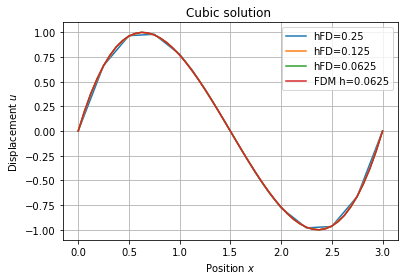

In [92]:
plt.grid()
plt.plot(x20,uSlice,label="hFD=0.25")
plt.plot(x7,uSlice2,label="hFD=0.125")
plt.plot(x11,uSlice3,label="hFD=0.0625")
plt.plot(xFDM,uFDM,label= "FDM h=0.0625")
plt.legend()
plt.xlabel(r"Position $x$")
plt.ylabel(r"Displacement $u$")
plt.title(r"Cubic solution ")

In [93]:
MFDM=FDM (49*2-1,0.0625/2)
len(MFDM)

97

In [94]:
fFDM=np.zeros([49*2-1])
len(fFDM)

97

In [95]:
len(uSlice3)

65

In [96]:
x = np.arange(0,3+0.0625/2,0.0625/2)
x

array([0.     , 0.03125, 0.0625 , 0.09375, 0.125  , 0.15625, 0.1875 ,
       0.21875, 0.25   , 0.28125, 0.3125 , 0.34375, 0.375  , 0.40625,
       0.4375 , 0.46875, 0.5    , 0.53125, 0.5625 , 0.59375, 0.625  ,
       0.65625, 0.6875 , 0.71875, 0.75   , 0.78125, 0.8125 , 0.84375,
       0.875  , 0.90625, 0.9375 , 0.96875, 1.     , 1.03125, 1.0625 ,
       1.09375, 1.125  , 1.15625, 1.1875 , 1.21875, 1.25   , 1.28125,
       1.3125 , 1.34375, 1.375  , 1.40625, 1.4375 , 1.46875, 1.5    ,
       1.53125, 1.5625 , 1.59375, 1.625  , 1.65625, 1.6875 , 1.71875,
       1.75   , 1.78125, 1.8125 , 1.84375, 1.875  , 1.90625, 1.9375 ,
       1.96875, 2.     , 2.03125, 2.0625 , 2.09375, 2.125  , 2.15625,
       2.1875 , 2.21875, 2.25   , 2.28125, 2.3125 , 2.34375, 2.375  ,
       2.40625, 2.4375 , 2.46875, 2.5    , 2.53125, 2.5625 , 2.59375,
       2.625  , 2.65625, 2.6875 , 2.71875, 2.75   , 2.78125, 2.8125 ,
       2.84375, 2.875  , 2.90625, 2.9375 , 2.96875, 3.     ])

In [97]:
x[0:32:2]

array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
       0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375])

In [98]:
x[len(x)-33:len(x):2]

array([2.    , 2.0625, 2.125 , 2.1875, 2.25  , 2.3125, 2.375 , 2.4375,
       2.5   , 2.5625, 2.625 , 2.6875, 2.75  , 2.8125, 2.875 , 2.9375,
       3.    ])

In [99]:
for i in range(1,len(fFDM)-1):
    fFDM[i] = -( 2/np.sqrt(3)) * ( -6 + 4*x[i]) 
fFDM

array([ 0.        ,  6.78386566,  6.6395281 ,  6.49519053,  6.35085296,
        6.20651539,  6.06217783,  5.91784026,  5.77350269,  5.62916512,
        5.48482756,  5.34048999,  5.19615242,  5.05181486,  4.90747729,
        4.76313972,  4.61880215,  4.47446459,  4.33012702,  4.18578945,
        4.04145188,  3.89711432,  3.75277675,  3.60843918,  3.46410162,
        3.31976405,  3.17542648,  3.03108891,  2.88675135,  2.74241378,
        2.59807621,  2.45373864,  2.30940108,  2.16506351,  2.02072594,
        1.87638837,  1.73205081,  1.58771324,  1.44337567,  1.29903811,
        1.15470054,  1.01036297,  0.8660254 ,  0.72168784,  0.57735027,
        0.4330127 ,  0.28867513,  0.14433757, -0.        , -0.14433757,
       -0.28867513, -0.4330127 , -0.57735027, -0.72168784, -0.8660254 ,
       -1.01036297, -1.15470054, -1.29903811, -1.44337567, -1.58771324,
       -1.73205081, -1.87638837, -2.02072594, -2.16506351, -2.30940108,
       -2.45373864, -2.59807621, -2.74241378, -2.88675135, -3.03

In [100]:
uFDM4 = np.linalg.solve(MFDM,fFDM)
uFDM4

array([-0.00000000e+00,  1.04893756e-01,  2.03162644e-01,  2.94947617e-01,
        3.80389630e-01,  4.59629639e-01,  5.32808598e-01,  6.00067461e-01,
        6.61547183e-01,  7.17388719e-01,  7.67733024e-01,  8.12721052e-01,
        8.52493757e-01,  8.87192095e-01,  9.16957019e-01,  9.41929486e-01,
        9.62250449e-01,  9.78060863e-01,  9.89501682e-01,  9.96713862e-01,
        9.99838357e-01,  9.99016121e-01,  9.94388110e-01,  9.86095278e-01,
        9.74278579e-01,  9.59078969e-01,  9.40637401e-01,  9.19094832e-01,
        8.94592214e-01,  8.67270503e-01,  8.37270654e-01,  8.04733621e-01,
        7.69800359e-01,  7.32611822e-01,  6.93308966e-01,  6.52032744e-01,
        6.08924112e-01,  5.64124024e-01,  5.17773435e-01,  4.70013299e-01,
        4.20984571e-01,  3.70828206e-01,  3.19685159e-01,  2.67696383e-01,
        2.15002835e-01,  1.61745467e-01,  1.08065236e-01,  5.41030953e-02,
       -9.32587341e-15, -5.41030953e-02, -1.08065236e-01, -1.61745467e-01,
       -2.15002835e-01, -

In [101]:
x[33:len(uFDM4)-34:1]

array([1.03125, 1.0625 , 1.09375, 1.125  , 1.15625, 1.1875 , 1.21875,
       1.25   , 1.28125, 1.3125 , 1.34375, 1.375  , 1.40625, 1.4375 ,
       1.46875, 1.5    , 1.53125, 1.5625 , 1.59375, 1.625  , 1.65625,
       1.6875 , 1.71875, 1.75   , 1.78125, 1.8125 , 1.84375, 1.875  ,
       1.90625, 1.9375 ])

In [102]:
xSlice = np.array(np.concatenate((x[0:31:2],x[32:len(uFDM4)-31:1],x[len(uFDM4)-32:len(uFDM4):2])))

In [103]:
len(xSlice)

66

In [104]:
xSlice

array([0.     , 0.0625 , 0.125  , 0.1875 , 0.25   , 0.3125 , 0.375  ,
       0.4375 , 0.5    , 0.5625 , 0.625  , 0.6875 , 0.75   , 0.8125 ,
       0.875  , 0.9375 , 1.     , 1.03125, 1.0625 , 1.09375, 1.125  ,
       1.15625, 1.1875 , 1.21875, 1.25   , 1.28125, 1.3125 , 1.34375,
       1.375  , 1.40625, 1.4375 , 1.46875, 1.5    , 1.53125, 1.5625 ,
       1.59375, 1.625  , 1.65625, 1.6875 , 1.71875, 1.75   , 1.78125,
       1.8125 , 1.84375, 1.875  , 1.90625, 1.9375 , 1.96875, 2.     ,
       2.03125, 2.03125, 2.09375, 2.15625, 2.21875, 2.28125, 2.34375,
       2.40625, 2.46875, 2.53125, 2.59375, 2.65625, 2.71875, 2.78125,
       2.84375, 2.90625, 2.96875])

In [105]:
len(x11)

65

In [106]:
uFDM4Slice = np.array(np.concatenate((uFDM4[0:33:2],uFDM4[33:len(uFDM4)-33:1],uFDM4[len(uFDM4)-33:len(uFDM4):2])))


In [107]:
MFDM2=FDM(25*2-1,0.125/2)
len(MFDM2)

49

In [108]:
fFDM2=np.zeros([25*2-1])
len(fFDM2)

49

In [109]:
x2 = np.arange(0,3+0.125/2,0.125/2)
x2

array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
       0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
       1.    , 1.0625, 1.125 , 1.1875, 1.25  , 1.3125, 1.375 , 1.4375,
       1.5   , 1.5625, 1.625 , 1.6875, 1.75  , 1.8125, 1.875 , 1.9375,
       2.    , 2.0625, 2.125 , 2.1875, 2.25  , 2.3125, 2.375 , 2.4375,
       2.5   , 2.5625, 2.625 , 2.6875, 2.75  , 2.8125, 2.875 , 2.9375,
       3.    ])

In [110]:
for i in range(1,len(fFDM2)-1):
    fFDM2[i] = -( 2/np.sqrt(3)) * ( -6 + 4*x2[i] ) 
fFDM2

array([ 0.        ,  6.6395281 ,  6.35085296,  6.06217783,  5.77350269,
        5.48482756,  5.19615242,  4.90747729,  4.61880215,  4.33012702,
        4.04145188,  3.75277675,  3.46410162,  3.17542648,  2.88675135,
        2.59807621,  2.30940108,  2.02072594,  1.73205081,  1.44337567,
        1.15470054,  0.8660254 ,  0.57735027,  0.28867513, -0.        ,
       -0.28867513, -0.57735027, -0.8660254 , -1.15470054, -1.44337567,
       -1.73205081, -2.02072594, -2.30940108, -2.59807621, -2.88675135,
       -3.17542648, -3.46410162, -3.75277675, -4.04145188, -4.33012702,
       -4.61880215, -4.90747729, -5.19615242, -5.48482756, -5.77350269,
       -6.06217783, -6.35085296, -6.6395281 ,  0.        ])

In [111]:
uFDM5 = np.linalg.solve(MFDM2,fFDM2)
uFDM5

array([-0.00000000e+00,  2.03162644e-01,  3.80389630e-01,  5.32808598e-01,
        6.61547183e-01,  7.67733024e-01,  8.52493757e-01,  9.16957019e-01,
        9.62250449e-01,  9.89501682e-01,  9.99838357e-01,  9.94388110e-01,
        9.74278579e-01,  9.40637401e-01,  8.94592214e-01,  8.37270654e-01,
        7.69800359e-01,  6.93308966e-01,  6.08924112e-01,  5.17773435e-01,
        4.20984571e-01,  3.19685159e-01,  2.15002835e-01,  1.08065236e-01,
       -1.06581410e-16, -1.08065236e-01, -2.15002835e-01, -3.19685159e-01,
       -4.20984571e-01, -5.17773435e-01, -6.08924112e-01, -6.93308966e-01,
       -7.69800359e-01, -8.37270654e-01, -8.94592214e-01, -9.40637401e-01,
       -9.74278579e-01, -9.94388110e-01, -9.99838357e-01, -9.89501682e-01,
       -9.62250449e-01, -9.16957019e-01, -8.52493757e-01, -7.67733024e-01,
       -6.61547183e-01, -5.32808598e-01, -3.80389630e-01, -2.03162644e-01,
        0.00000000e+00])

In [112]:
xSlice2 = np.array(np.concatenate((x[0:17:2],x[17:len(x)-17:1],x[len(x)-17:len(x):2])))
xSlice2

array([0.     , 0.0625 , 0.125  , 0.1875 , 0.25   , 0.3125 , 0.375  ,
       0.4375 , 0.5    , 0.53125, 0.5625 , 0.59375, 0.625  , 0.65625,
       0.6875 , 0.71875, 0.75   , 0.78125, 0.8125 , 0.84375, 0.875  ,
       0.90625, 0.9375 , 0.96875, 1.     , 1.03125, 1.0625 , 1.09375,
       1.125  , 1.15625, 1.1875 , 1.21875, 1.25   , 1.28125, 1.3125 ,
       1.34375, 1.375  , 1.40625, 1.4375 , 1.46875, 1.5    , 1.53125,
       1.5625 , 1.59375, 1.625  , 1.65625, 1.6875 , 1.71875, 1.75   ,
       1.78125, 1.8125 , 1.84375, 1.875  , 1.90625, 1.9375 , 1.96875,
       2.     , 2.03125, 2.0625 , 2.09375, 2.125  , 2.15625, 2.1875 ,
       2.21875, 2.25   , 2.28125, 2.3125 , 2.34375, 2.375  , 2.40625,
       2.4375 , 2.46875, 2.5    , 2.5625 , 2.625  , 2.6875 , 2.75   ,
       2.8125 , 2.875  , 2.9375 , 3.     ])

In [113]:
uFDM5Slice = np.array(np.concatenate((uFDM5[0:17:2],uFDM5[17:len(uFDM5)-17:1],uFDM5[len(uFDM5)-17:len(uFDM5):2])))  
len(uFDM5Slice)


33

In [114]:
uSlice2-uFDM5Slice

array([-3.33066907e-16,  2.63771314e-04,  5.27542629e-04,  7.91313943e-04,
        1.05508526e-03,  1.31885657e-03,  1.58262789e-03,  1.84639920e-03,
        2.11017052e-03,  1.87170952e-03,  1.60005397e-03,  1.33409371e-03,
        1.06715630e-03,  8.00386537e-04,  5.33588011e-04,  2.66794417e-04,
       -7.13145227e-15, -2.66794417e-04, -5.33588011e-04, -8.00386537e-04,
       -1.06715630e-03, -1.33409371e-03, -1.60005397e-03, -1.87170952e-03,
       -2.11017052e-03, -1.84639920e-03, -1.58262789e-03, -1.31885657e-03,
       -1.05508526e-03, -7.91313943e-04, -5.27542629e-04, -2.63771314e-04,
        0.00000000e+00])

In [115]:
MFDM3=FDM(13*2-1,0.25/2)
len(MFDM3)

25

In [116]:
fFDM3=np.zeros([13*2-1])
len(fFDM3)

25

In [117]:
x3 = np.arange(0,3+0.25/2,0.25/2)
x3

array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ,
       1.125, 1.25 , 1.375, 1.5  , 1.625, 1.75 , 1.875, 2.   , 2.125,
       2.25 , 2.375, 2.5  , 2.625, 2.75 , 2.875, 3.   ])

In [118]:
for i in range(1,len(fFDM3)-1):
    fFDM3[i] = -( 2/np.sqrt(3)) * ( -6 + 4*x3[i] ) 

In [119]:
uFDM6 = np.linalg.solve(MFDM3,fFDM3)
uFDM6

array([-0.00000000e+00,  3.80389630e-01,  6.61547183e-01,  8.52493757e-01,
        9.62250449e-01,  9.99838357e-01,  9.74278579e-01,  8.94592214e-01,
        7.69800359e-01,  6.08924112e-01,  4.20984571e-01,  2.15002835e-01,
        1.05044178e-15, -2.15002835e-01, -4.20984571e-01, -6.08924112e-01,
       -7.69800359e-01, -8.94592214e-01, -9.74278579e-01, -9.99838357e-01,
       -9.62250449e-01, -8.52493757e-01, -6.61547183e-01, -3.80389630e-01,
        0.00000000e+00])

In [120]:
xSlice3 = np.array(np.concatenate((x[0:10:2],x[9:len(x)-9:1],x[len(x)-9:len(x):2])))
xSlice3

array([0.     , 0.0625 , 0.125  , 0.1875 , 0.25   , 0.28125, 0.3125 ,
       0.34375, 0.375  , 0.40625, 0.4375 , 0.46875, 0.5    , 0.53125,
       0.5625 , 0.59375, 0.625  , 0.65625, 0.6875 , 0.71875, 0.75   ,
       0.78125, 0.8125 , 0.84375, 0.875  , 0.90625, 0.9375 , 0.96875,
       1.     , 1.03125, 1.0625 , 1.09375, 1.125  , 1.15625, 1.1875 ,
       1.21875, 1.25   , 1.28125, 1.3125 , 1.34375, 1.375  , 1.40625,
       1.4375 , 1.46875, 1.5    , 1.53125, 1.5625 , 1.59375, 1.625  ,
       1.65625, 1.6875 , 1.71875, 1.75   , 1.78125, 1.8125 , 1.84375,
       1.875  , 1.90625, 1.9375 , 1.96875, 2.     , 2.03125, 2.0625 ,
       2.09375, 2.125  , 2.15625, 2.1875 , 2.21875, 2.25   , 2.28125,
       2.3125 , 2.34375, 2.375  , 2.40625, 2.4375 , 2.46875, 2.5    ,
       2.53125, 2.5625 , 2.59375, 2.625  , 2.65625, 2.6875 , 2.71875,
       2.75   , 2.8125 , 2.875  , 2.9375 , 3.     ])

In [121]:
uFDM6Slice = np.array(np.concatenate((uFDM6[0:10:2],uFDM6[9:len(uFDM6)-9:1],uFDM6[len(uFDM6)-9:len(uFDM6):2])))  
len(uFDM6Slice)

17

In [122]:
uSlice-uFDM6Slice

array([ 0.00000000e+00,  2.09404797e-03,  4.18809594e-03,  6.28214391e-03,
        8.37619188e-03,  6.46044147e-03,  4.27914150e-03,  2.14336432e-03,
       -2.24865929e-16, -2.14336432e-03, -4.27914150e-03, -6.46044147e-03,
       -8.37619188e-03, -6.28214391e-03, -4.18809594e-03, -2.09404797e-03,
        0.00000000e+00])

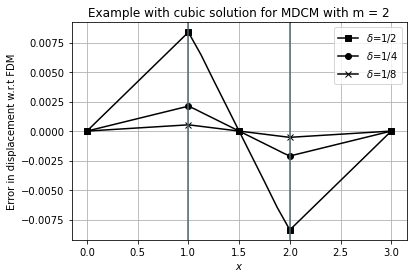

In [131]:
markers = ['s','o','x','.']
level = [4,8,16,64]

plt.plot(x20,uSlice-uFDM6Slice,color="black",marker=markers[0],markevery=level[0],label=r"$\delta$=1/2")
plt.plot(x7,uSlice2-uFDM5Slice,color="black",marker=markers[1],markevery=level[1],label=r"$\delta$=1/4")
plt.plot(x11,uSlice3-uFDM4Slice,color="black",marker=markers[2],markevery=level[2],label=r"$\delta$=1/8")
plt.legend()
plt.grid()
plt.title(r"Example with " + "cubic" + " solution for MDCM with m = 2")
plt.xlabel(r"$x$")
plt.ylabel(r"Error in displacement w.r.t FDM")
plt.axvline(x=1,c="#536872")
plt.axvline(x=2,c="#536872")
plt.savefig("coupling-mdcm-"+"cubic"+"-dirchelt-error.pdf",bbox_inches='tight')